# Forecasting Assignment - 2 - CocoCola Sales Data Set 

### Import necessary library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

### Import dataset

In [44]:
cococola_data = pd.read_excel("D:\\Sandesh\\Data Science\\Homework Assignment\\Machine Learning\\Forecasting\\CocaCola_Sales_Rawdata.xlsx")
cococola_data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


### Initial analysis

In [3]:
cococola_data.shape

(42, 2)

In [4]:
cococola_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
cococola_data.dtypes

Quarter     object
Sales      float64
dtype: object

### Visualization of data

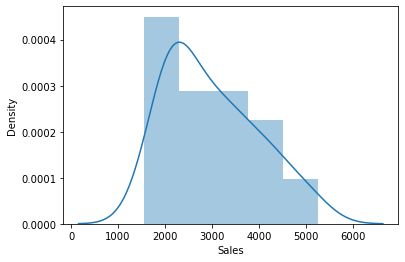

In [6]:
sns.distplot(cococola_data['Sales'])
plt.show()

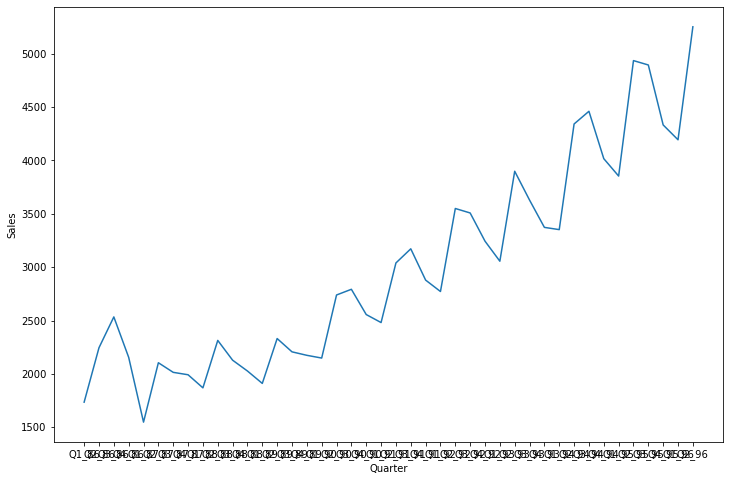

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(x= 'Quarter',y= 'Sales',data=cococola_data)
plt.show()

<AxesSubplot:>

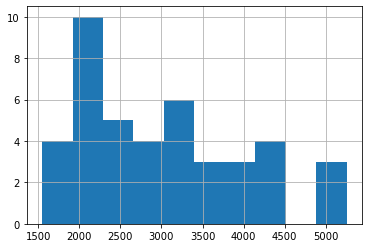

In [8]:
cococola_data.Sales.hist()

In [9]:
# We will extract Quarter values and Year values separately from 'Quarter column'

cococola_data['quarter'] = 0
cococola_data['year'] = 0
for i in range(42):
    p = cococola_data["Quarter"][i]
    cococola_data['quarter'][i]= p[0:2]
    cococola_data['year'][i]= p[3:5]
        

In [10]:
cococola_data.head()

,Quarter,Sales,quarter,year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [11]:
cococola_data.dtypes

Quarter     object
Sales      float64
quarter     object
year         int64
dtype: object

In [12]:
cococola_data['Year'] = pd.to_numeric(cococola_data['year'])

In [13]:
cococola_data.head()

,Quarter,Sales,quarter,year,Year
0,Q1_86,1734.827000,Q1,86,86
1,Q2_86,2244.960999,Q2,86,86
2,Q3_86,2533.804993,Q3,86,86
3,Q4_86,2154.962997,Q4,86,86
4,Q1_87,1547.818996,Q1,87,87


In [14]:
cococola_data.dtypes

Quarter     object
Sales      float64
quarter     object
year         int64
Year         int64
dtype: object

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

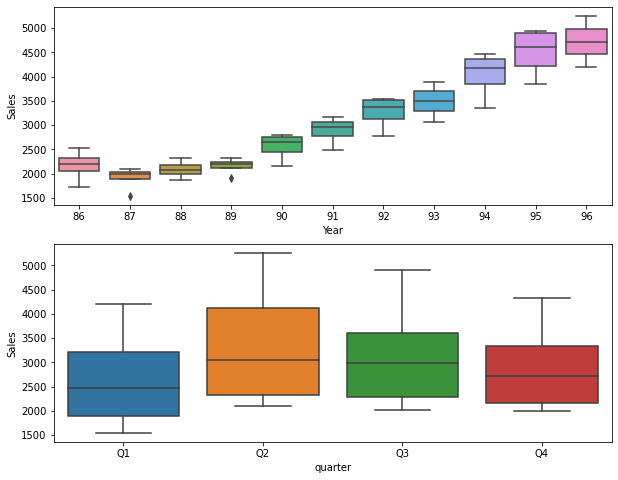

In [15]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x= 'Year',y = 'Sales',data=cococola_data)
plt.subplot(212)
sns.boxplot(x= 'quarter',y = 'Sales',data=cococola_data)

In [16]:
pivot_table = pd.pivot_table(data=cococola_data ,values='Sales',index='Year',columns='quarter',aggfunc='mean',fill_value=0)
round(pivot_table)

quarter,Q1,Q2,Q3,Q4
Year,,,,
86,1735.0,2245.0,2534.0,2155.0
87,1548.0,2104.0,2014.0,1992.0
88,1869.0,2314.0,2128.0,2027.0
89,1911.0,2331.0,2207.0,2174.0
90,2148.0,2739.0,2793.0,2556.0
91,2481.0,3040.0,3172.0,2879.0
92,2772.0,3550.0,3508.0,3244.0
93,3056.0,3899.0,3629.0,3373.0
94,3352.0,4342.0,4461.0,4017.0


<AxesSubplot:xlabel='quarter', ylabel='Year'>

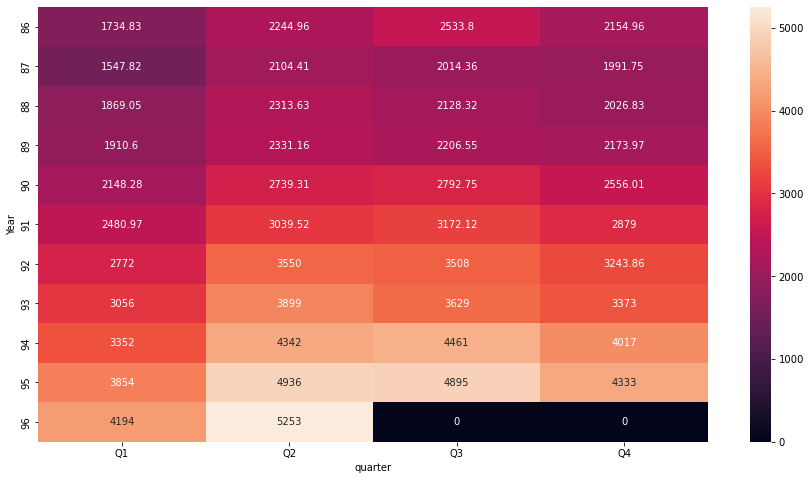

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(pivot_table,annot=True,fmt='g')

In [18]:
quarter_dummies = pd.get_dummies(cococola_data['quarter'])
quarter_dummies.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [19]:
data = pd.concat([cococola_data,quarter_dummies],axis = 1)
data.head()

,Quarter,Sales,quarter,year,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,87,1,0,0,0


In [20]:
coco_data = data.drop(labels='year',axis=1)
coco_data.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [21]:
coco_data.dtypes

Quarter     object
Sales      float64
quarter     object
Year         int64
Q1           uint8
Q2           uint8
Q3           uint8
Q4           uint8
dtype: object

In [22]:
coco_data['t']= np.arange(1,43)
coco_data['t_sales'] = coco_data['t']*coco_data['t']
coco_data['log_sales'] = np.log(coco_data['Sales'])

In [23]:
coco_data.head()

,Quarter,Sales,quarter,Year,Q1,Q2,Q3,Q4,t,t_sales,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


### Model building

In [24]:
train = coco_data.head(30)
test = coco_data.tail(12)

In [25]:
# linear model
linear_model = smf.ols('Sales~t',data=train).fit()
pred_linear = linear_model.predict(test)
rmse_linear = np.sqrt(mean_squared_error(test['Sales'],pred_linear))
rmse_linear

714.0144483281299

In [26]:
# quadratic model
quadratic_model = smf.ols('Sales~t+t_sales',data=train).fit()
pred_quadratic = quadratic_model.predict(test)
rmse_quadratic = np.sqrt(mean_squared_error(test['Sales'],pred_quadratic))
rmse_quadratic

646.2715428311304

In [27]:
# exponential model
ex_model = smf.ols('log_sales~t',data=train).fit()
pred_ex = ex_model.predict(test)
rmse_ex = np.sqrt(mean_squared_error(test['Sales'],np.exp(pred_ex)))
rmse_ex

552.2821039079275

In [28]:
# addictive seasonality
add_model = smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_add = add_model.predict(test)
rmse_add = np.sqrt(mean_squared_error(test['Sales'],pred_add))
rmse_add

1778.006546794136

In [29]:
# addictive seasonality quadratis
add_sea_model = smf.ols('Sales~t+t_sales+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_sea = add_sea_model.predict(test)
rmse_add_sea= np.sqrt(mean_squared_error(test['Sales'],pred_add_sea))
rmse_add_sea

586.053306787104

In [30]:
# multiplicative seasonality
multi_model = smf.ols('log_sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_multi = multi_model.predict(test)
rmse_multi = np.sqrt(mean_squared_error(test['Sales'],np.exp(pred_multi)))
rmse_multi

1828.9238912138076

In [31]:
# multiplicative addictive seasonality
multi_add_model = smf.ols('log_sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_multi_add = multi_add_model.predict(test)
rmse_multi_add = np.sqrt(mean_squared_error(test['Sales'],np.exp(pred_multi_add)))
rmse_multi_add

410.2497059607809

In [32]:
# compare the model
data = pd.DataFrame({'model':(['linear_model','quadratic_model','ex_model','add_model','add_sea_model','multi_model','multi_add_model']),
                     'rmse_value':([rmse_linear,rmse_quadratic,rmse_ex,rmse_add,rmse_add_sea,rmse_multi,rmse_multi_add])})
data.sort_values('rmse_value')

,model,rmse_value
6,multi_add_model,410.249706
2,ex_model,552.282104
4,add_sea_model,586.053307
1,quadratic_model,646.271543
0,linear_model,714.014448
3,add_model,1778.006547
5,multi_model,1828.923891


In [33]:
# According to compare data, multiplicative addictive seasonality is best model because rmse value is less.

In [34]:
new_data = [['Q3_96','Q3'],['Q4_96','Q4'],['Q1_97','Q1'],['Q2_97','Q2']]
new_data1 = pd.DataFrame(new_data,columns=['Quarter','quarter'])
new_data1

,Quarter,quarter
0,Q3_96,Q3
1,Q4_96,Q4
2,Q1_97,Q1
3,Q2_97,Q2


In [35]:
dummies = pd.get_dummies(new_data1['quarter'])

In [36]:
dummies

,Q1,Q2,Q3,Q4
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0


In [37]:
final_data = pd.concat([new_data1,dummies],axis = 1)

In [38]:
final_data

,Quarter,quarter,Q1,Q2,Q3,Q4
0,Q3_96,Q3,0,0,1,0
1,Q4_96,Q4,0,0,0,1
2,Q1_97,Q1,1,0,0,0
3,Q2_97,Q2,0,1,0,0


In [39]:
final_data['t']= np.arange(44,48)
final_data['t_square'] = final_data['t']*final_data['t']
final_data

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q3_96,Q3,0,0,1,0,44,1936
1,Q4_96,Q4,0,0,0,1,45,2025
2,Q1_97,Q1,1,0,0,0,46,2116
3,Q2_97,Q2,0,1,0,0,47,2209


### Forecasting

In [40]:
pred_final = multi_add_model.predict(final_data)

In [41]:
x = np.exp(pred_final)
x

0    4789.068613
1    4458.417547
2    4150.699813
3    5272.872466
dtype: float64

In [42]:
final_data['pred_sales'] = pd.DataFrame(round(x))

In [43]:
final_data

,Quarter,quarter,Q1,Q2,Q3,Q4,t,t_square,pred_sales
0,Q3_96,Q3,0,0,1,0,44,1936,4789.0
1,Q4_96,Q4,0,0,0,1,45,2025,4458.0
2,Q1_97,Q1,1,0,0,0,46,2116,4151.0
3,Q2_97,Q2,0,1,0,0,47,2209,5273.0


####  According to results for this cococola data we can use multiplicative addictive seasonality model because the mean square error is less of this model

# END 